In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
from numpy.linalg import matrix_power
from scipy.sparse.csgraph import laplacian
import scipy.linalg as la
import random
import time
import pandas as pd

# EX1.1

In [2]:
def P_ER_Graph(k,p) :
    G= nx.erdos_renyi_graph(k,p) 
   # nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
    #plt.show() 
    return(G)

In [3]:
def R_regular_Graph(k,r) :
    G= nx.random_regular_graph(r,k) 
   # nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
    #plt.show() 
    return(G)

In [4]:
P_ER_Graph(100,0.3)

In [5]:
R_regular_Graph(100,3)

# Ex1.2

In [6]:
def irreducibility (graph,k) :
    A = nx.to_numpy_matrix(graph)
    B = np.zeros((k,k))
    for i in range(k):
        B = B + matrix_power(A, i)
    if np.all(B > 0) :
        return(1)
    return(0)

In [7]:
def BFS(graph, k, start_node = 2) :
    level = {start_node : 0}
    parent = {start_node : None}
    i = 0
    frontier = [start_node]
    while frontier:
        next_node = []
        for u in frontier:
            for v in list(graph[u]):
                if v not in level:
                    level[v] = i
                    parent[v] = u
                    next_node.append(v)
        frontier = next_node
        i += 1
    if len((list(level))) == k :
        return(1)
    return(0)

In [8]:
#gives 0 or 1 if graph is not connected or connected
def Laplacian(graph) :
    A = nx.to_numpy_matrix(graph)
    L = laplacian(A)
    eingevalues, eingevectors = la.eig(L)
    sort_values = np.sort(eingevalues)
    if sort_values[1] > 0 :
        return(1)
    return(0)

#TO BE DISCUSSED 
def Laplacian1(graph):
    spectrum = np.sort(nx.laplacian_spectrum(G))
    if spectrum[1] > 0:
        return(1)
    else:
        return(0)

In [9]:
G = P_ER_Graph(10,.5)

In [10]:
irreducibility (G,10)

1

In [11]:
BFS(G, 10, start_node = 2)

1

In [12]:
Laplacian(G)

1

## EX1.3

For measuring the complexity of the 3 functions, we use the average running time of these functions over arbitrary #samples specified by the user.

In [13]:
def time_irreducibility(sample_number) :
    run_time = []
    for k in range(2,80,2):
       # print(k)
        tim = 0
        for i in range(sample_number) :
            p = random.uniform(0,1)
            G = P_ER_Graph(k,p)
            start = time.time()
            irreducibility(G,k)
            end = time.time()
            tim = tim + end-start
        run_time.append(tim / sample_number)
    return(run_time)

In [14]:
def time_Laplacian(sample_number) :
    run_time = []
    for k in range(2,80,2):
       # print(k)
        tim = 0
        for i in range(sample_number) :
            p = random.uniform(0,1)
            G = P_ER_Graph(k,p)
            start = time.time()
            Laplacian(G)
            end = time.time()
            tim = tim + end - start
        run_time.append(tim / sample_number)
    return(run_time)

In [15]:
def time_BFS(sample_number):
    run_time = []
    for k in range(2,80,2):
      #  print(k)  
        tim = 0
        for i in range(sample_number) :
            p = random.uniform(0,1)
            G = P_ER_Graph(k,p)
            start = time.time()
            BFS(G, k, start_node = 1 )
            end = time.time()
            tim = tim +end-start
        run_time.append(tim / sample_number)
    return(run_time)

In [16]:
def dfgenerator(sample_number):
    df = pd.DataFrame(list(zip(time_irreducibility(sample_number), time_Laplacian(sample_number),
                      time_BFS(sample_number))), index = list(range(2,80, 2)), columns=['Irreducibility', 'Laplacian', 'BFS'] )
    return df  

In [17]:
def plotter(samples, method):
    a = dfgenerator(samples)
    if method == 0:
        plt.figure()
        a.plot()
        plt.title('Compare complexity versus number of nodes k')
        plt.xlabel('k')
        plt.ylabel('Avg Running time')
        plt.savefig( 'Compare' + str(method)+ '.png', bbox_inches='tight')
    else:
        plt.figure()
        a[method].plot()
        plt.title('Compare complexity versus number of nodes k for' + str(method))
        plt.xlabel('k')
        plt.ylabel('Avg Running time')
        plt.savefig( 'Compare' + str(method) +'.png', bbox_inches='tight')

## The Three curve plot, and singular plots for every method!

<Figure size 432x288 with 0 Axes>

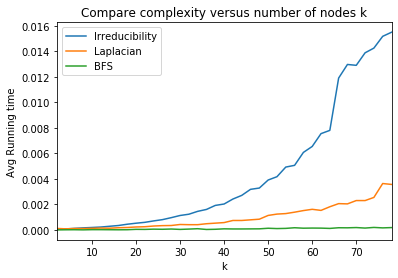

In [18]:
#Now let's plot singularly!
plotter(200,0)

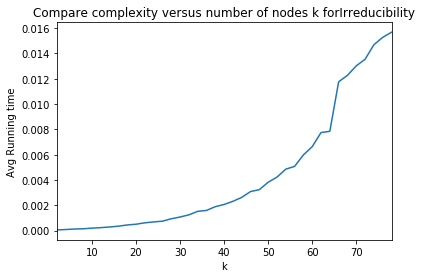

In [18]:
plotter(100, 'Irreducibility')

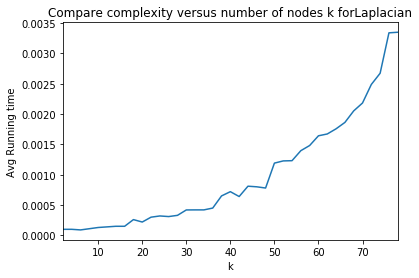

In [19]:
plotter(100, 'Laplacian')

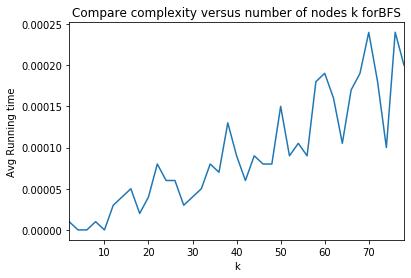

In [20]:
plotter(100, 'BFS')

## EX1.4 connectivity

### Part1: Probability of connectivity VS P in ER-Graph with k = 100

In [22]:
def ER_connectivity (sample_number):
    prob = dict()
    k = 100
    for p in np.arange(0, 1, 0.005).tolist() :
        count = 0
        for i in range(sample_number) :
            G = P_ER_Graph(k,p)
            count += BFS(G, k, start_node = 1)
        prob[p] = count/sample_number
    return(prob)

In [23]:
def make_plot(dict, title, var, y_label) :
    lists = sorted(dict.items())
    x, y = zip(*lists)
    plt.plot(x, y, 'ro', x , y , 'k')
    plt.xlabel(var)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig( title + '.png', bbox_inches='tight')
   # plt.show()

In [ ]:
make_plot(ER_connectivity(100), 'Probability of connectivity VS P in ER-Graph', 'p', 'probability of connectivity')

### Part2: P(connectivity of r-regular graph) VS k

In [36]:
def R_regular_connectivity (sample_number,R):
    prob = dict()
    r = R #degree nodes
    for k in range(10, 100, 4) :
        count = 0
        for i in range(sample_number) :
            G = R_regular_Graph(k,r)
            count += BFS(G, k, start_node = 1)
        prob[k] = count/sample_number
    return(prob)

In [37]:
def make_Dual_plot(dict1,dict2, title,var) :
    lists1 = sorted(dict1.items())
    lists2 = sorted(dict2.items())
    x, y = zip(*lists1)
    s, w = zip(*lists2)
    plt.plot(x, y, 'ro', x , y , 'k')
    plt.plot(s, w, 'bo', s , w , 'k')
    plt.xlabel(var)
    plt.ylabel('Probability of connectivity')
    plt.title(title)
    plt.text(90, 0.9, 'r=8')
    plt.text(90, 0.2, 'r=2')
    plt.savefig( title + '.png', bbox_inches='tight')
    plt.show()

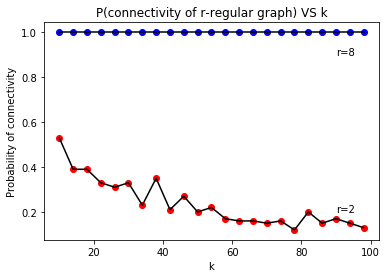

In [38]:
make_Dual_plot(R_regular_connectivity (100,2),R_regular_connectivity (100,8), 'P(connectivity of r-regular graph) VS k','k')